<a href="https://colab.research.google.com/github/leman-cap13/my_projects/blob/main/Diabetes_prediction_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (3).json


{'kaggle (3).json': b'{"username":"lmanqasml","key":"2d851a4eb9cae06770577185722326e0"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download marshalpatel3558/diabetes-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/marshalpatel3558/diabetes-prediction-dataset
License(s): MIT
diabetes-prediction-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
with zipfile.ZipFile('/content/diabetes-prediction-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
import pandas as pd
df = pd.read_csv('/content/diabetes_dataset.csv')
df

,Unnamed: 0,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes
0,0,58,Female,White,35.8,83.4,123.9,10.9,152,114,197.8,50.2,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1
1,1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,261.6,62.0,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1
2,2,34,Female,Black,25.0,113.8,142.0,14.5,179,104,261.0,32.1,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0
3,3,62,Male,Asian,32.7,100.4,167.4,8.8,176,118,183.4,41.1,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0
4,4,27,Female,Asian,33.5,110.8,146.4,7.1,122,97,203.2,53.9,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,45,Female,Asian,39.4,114.0,76.2,13.4,109,82,187.7,60.3,88.7,19.1,6.1,Low,3582,NaN,Former,1,1
9996,9996,41,Female,Asian,21.0,71.3,77.1,12.9,154,72,234.3,72.3,200.0,37.1,3.5,Low,2206,NaN,Never,1,1
9997,9997,50,Female,Asian,29.0,106.3,97.5,4.9,122,61,266.0,69.8,156.1,85.8,4.9,High,3175,Heavy,Former,1,1
9998,9998,62,Female,White,27.3,119.9,89.0,11.5,99,115,172.3,74.2,110.9,25.3,5.2,High,3478,Moderate,Never,1,0


In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
Age,0
Sex,0
Ethnicity,0
BMI,0
Waist_Circumference,0
Fasting_Blood_Glucose,0
HbA1c,0
Blood_Pressure_Systolic,0
Blood_Pressure_Diastolic,0


In [ ]:
df.describe()

,Unnamed: 0,Age,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Dietary_Intake_Calories,Family_History_of_Diabetes,Previous_Gestational_Diabetes
count,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,44.620400,29.418150,94.79707,134.776210,9.507510,134.163700,89.558700,225.165540,55.019340,134.35377,55.16822,5.503430,2742.481900,0.507000,0.516500
std,2886.89568,14.343489,6.170866,14.38329,37.633544,3.176421,26.110317,17.237792,42.963744,14.537371,37.50238,25.88180,1.455091,716.643803,0.499976,0.499753
min,0.00000,20.000000,18.500000,70.00000,70.000000,4.000000,90.000000,60.000000,150.000000,30.000000,70.00000,10.00000,3.000000,1500.000000,0.000000,0.000000
25%,2499.75000,32.000000,24.100000,82.20000,102.175000,6.800000,112.000000,75.000000,187.875000,42.300000,101.67500,32.60000,4.200000,2129.000000,0.000000,0.000000
50%,4999.50000,45.000000,29.500000,94.90000,134.500000,9.500000,134.000000,89.000000,225.500000,55.200000,134.40000,55.45000,5.500000,2727.000000,1.000000,1.000000
75%,7499.25000,57.000000,34.700000,107.00000,167.800000,12.300000,157.000000,105.000000,262.400000,67.900000,166.40000,77.50000,6.800000,3368.000000,1.000000,1.000000
max,9999.00000,69.000000,40.000000,120.00000,200.000000,15.000000,179.000000,119.000000,300.000000,80.000000,200.00000,100.00000,8.000000,3999.000000,1.000000,1.000000


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.corr(numeric_only=True)

,Unnamed: 0,Age,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Dietary_Intake_Calories,Family_History_of_Diabetes,Previous_Gestational_Diabetes
Unnamed: 0,1.000000,-0.001209,-0.018955,0.007566,-0.003420,0.010475,-0.011905,-0.003810,-0.000264,-0.011446,-0.008150,0.004786,0.003517,0.000554,0.009104,-0.006914
Age,-0.001209,1.000000,0.009352,-0.002602,0.002696,0.003153,0.002470,0.011472,-0.005088,-0.005920,0.013345,-0.001156,-0.014950,-0.006665,-0.004413,-0.000354
BMI,-0.018955,0.009352,1.000000,-0.014291,-0.014478,-0.008163,-0.002235,-0.007163,0.004686,0.011594,0.000313,0.001105,0.002376,0.017876,-0.007728,-0.001130
Waist_Circumference,0.007566,-0.002602,-0.014291,1.000000,0.009080,0.000019,-0.003090,-0.020355,0.005030,0.001525,-0.015512,0.009369,-0.003502,0.002032,0.019497,-0.015168
Fasting_Blood_Glucose,-0.003420,0.002696,-0.014478,0.009080,1.000000,-0.013554,-0.000139,0.004556,-0.015649,-0.002111,0.007528,-0.005200,-0.006336,-0.006742,-0.000655,-0.023421
HbA1c,0.010475,0.003153,-0.008163,0.000019,-0.013554,1.000000,-0.004641,-0.008879,-0.004754,-0.012807,0.007864,-0.002463,-0.001842,0.011890,-0.000616,-0.001707
Blood_Pressure_Systolic,-0.011905,0.002470,-0.002235,-0.003090,-0.000139,-0.004641,1.000000,0.000973,-0.003366,0.010689,0.007112,0.001255,-0.009286,0.019030,0.002138,-0.008987
Blood_Pressure_Diastolic,-0.003810,0.011472,-0.007163,-0.020355,0.004556,-0.008879,0.000973,1.000000,0.003907,-0.004867,-0.021146,0.001859,0.004302,-0.002480,-0.012180,0.008571
Cholesterol_Total,-0.000264,-0.005088,0.004686,0.005030,-0.015649,-0.004754,-0.003366,0.003907,1.000000,-0.009679,-0.002241,0.013314,-0.004182,0.010119,-0.008553,0.003354
Cholesterol_HDL,-0.011446,-0.005920,0.011594,0.001525,-0.002111,-0.012807,0.010689,-0.004867,-0.009679,1.000000,0.005851,-0.009205,-0.008040,0.000780,-0.010663,-0.001403


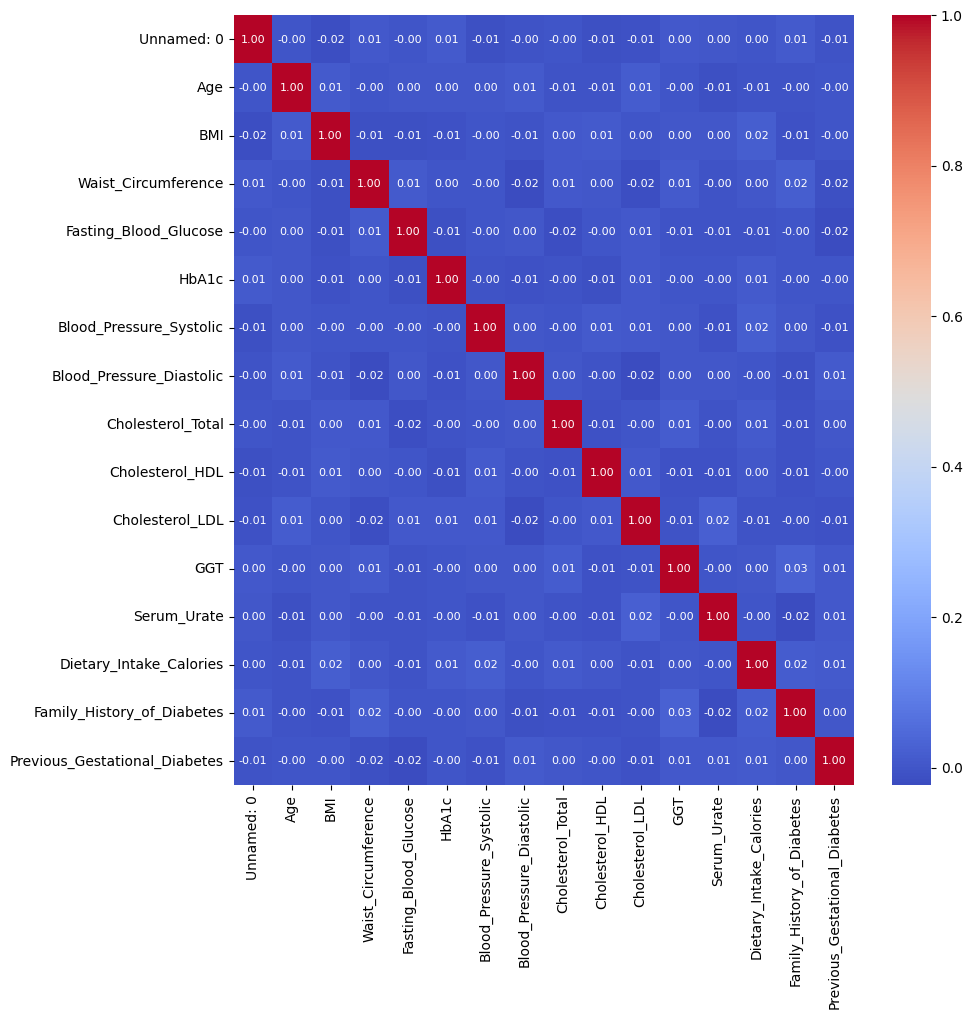

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={"size":8},cmap="coolwarm")

plt.show();

In [ ]:
df['Previous_Gestational_Diabetes'].value_counts()

,count
Previous_Gestational_Diabetes,
1,5165
0,4835


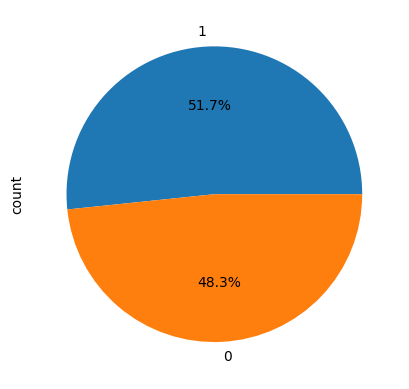

In [ ]:
df['Previous_Gestational_Diabetes'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

Medically, it is impossible for men to experience previous gestational diabetes because:

Gestational diabetes is a type of diabetes that occurs only during pregnancy, and

Only women can get pregnant, so only they can experience this condition.

In [ ]:
Male_1 = df[(df['Sex'] == 'Male') & (df['Previous_Gestational_Diabetes'] == 1)]
print(f'Many male individuals are indicated to have experienced Previous Gestational Diabetes,which is {Male_1.shape[0]} people or {(Male_1.shape[0]/len(df))* 100} %.')



Many male individuals are indicated to have experienced Previous Gestational Diabetes,which is 2600 people or 26.0 %.


In [ ]:
Male_1.shape

(2600, 21)

In [ ]:
df.loc[(df['Sex'] == 'Male') & (df['Previous_Gestational_Diabetes'] == 1), 'Previous_Gestational_Diabetes'] = 0

In [ ]:
Male_1 = df[(df['Sex'] == 'Male') & (df['Previous_Gestational_Diabetes'] == 1)]
print(f'Many male individuals are indicated to have experienced Previous Gestational Diabetes, which is {Male_1.shape[0]} people or {(Male_1.shape[0]/len(df))* 100} %.')

Many male individuals are indicated to have experienced Previous Gestational Diabetes, which is 0 people or 0.0 %.


In [ ]:
sex_groups = df.groupby('Sex').size().reset_index(name='count')
sex_groups['percentage'] = (sex_groups['count'] / len(df)) * 100
sex_groups = sex_groups.sort_values(by='count', ascending=False)
sex_groups

,Sex,count,percentage
0,Female,5005,50.05
1,Male,4995,49.95


In [ ]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Ethnicity', 'BMI', 'Waist_Circumference',
       'Fasting_Blood_Glucose', 'HbA1c', 'Blood_Pressure_Systolic',
       'Blood_Pressure_Diastolic', 'Cholesterol_Total', 'Cholesterol_HDL',
       'Cholesterol_LDL', 'GGT', 'Serum_Urate', 'Physical_Activity_Level',
       'Dietary_Intake_Calories', 'Alcohol_Consumption', 'Smoking_Status',
       'Family_History_of_Diabetes', 'Previous_Gestational_Diabetes'],
      dtype='object')

In [ ]:
df['Fasting_Blood_Glucose'].value_counts()

,count
Fasting_Blood_Glucose,
190.8,18
156.8,17
171.8,17
149.8,16
73.7,16
...,...
121.4,2
122.4,2
134.7,2


In [ ]:
df['HbA1c'].min()

4.0

In [ ]:
# df['Diabetes'] = ((df['Fasting_Blood_Glucose'] > 125) | (df['HbA1c'] >6.5)).astype(int)

In [ ]:
df['Diabetes'] = ((df['Fasting_Blood_Glucose'] > 125)).astype(int)

In [ ]:
df['Diabetes'].value_counts()

,count
Diabetes,
1,5746
0,4254


In [ ]:
df.shape

(10000, 22)

In [ ]:
# def classify_diabetes(row):
#     if row['Fasting_Blood_Glucose'] >= 126 or row['HbA1c'] >= 6.5:
#         return 2  # Diabetes
#     elif (100 <= row['Fasting_Blood_Glucose'] <= 125) or (5.7 <= row['HbA1c'] <= 6.4):
#         return 1  # Prediabetes
#     else:
#         return 0  # Normal

# df['Diabetes_Status'] = df.apply(classify_diabetes, axis=1)


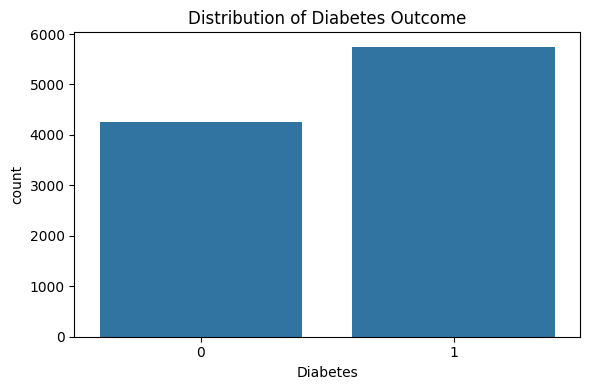

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Diabetes', data=df)
plt.title('Distribution of Diabetes Outcome')
plt.tight_layout()
plt.show()

In [ ]:
df

,Unnamed: 0,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes,Diabetes
0,0,58,Female,White,35.8,83.4,123.9,10.9,152,114,197.8,50.2,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1,0
1,1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,261.6,62.0,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,0,1
2,2,34,Female,Black,25.0,113.8,142.0,14.5,179,104,261.0,32.1,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0,1
3,3,62,Male,Asian,32.7,100.4,167.4,8.8,176,118,183.4,41.1,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0,1
4,4,27,Female,Asian,33.5,110.8,146.4,7.1,122,97,203.2,53.9,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,45,Female,Asian,39.4,114.0,76.2,13.4,109,82,187.7,60.3,88.7,19.1,6.1,Low,3582,NaN,Former,1,1,0
9996,9996,41,Female,Asian,21.0,71.3,77.1,12.9,154,72,234.3,72.3,200.0,37.1,3.5,Low,2206,NaN,Never,1,1,0
9997,9997,50,Female,Asian,29.0,106.3,97.5,4.9,122,61,266.0,69.8,156.1,85.8,4.9,High,3175,Heavy,Former,1,1,0
9998,9998,62,Female,White,27.3,119.9,89.0,11.5,99,115,172.3,74.2,110.9,25.3,5.2,High,3478,Moderate,Never,1,0,0


In [ ]:
import numpy as np

In [ ]:
def remove_outliers(df):
    for column in df.select_dtypes(include=np.number).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + 1.5 * IQR
        lower_bound = Q1 - 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [ ]:
df=remove_outliers(df)

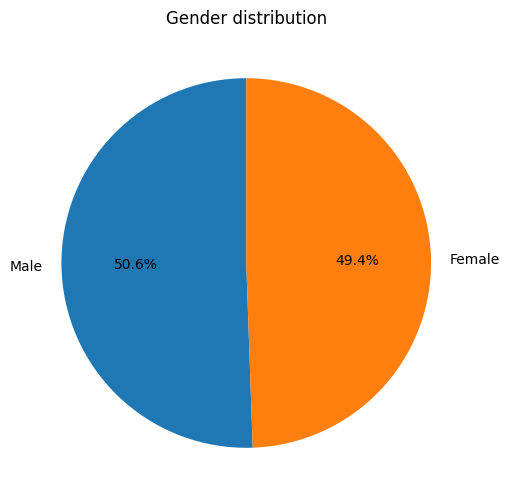

In [ ]:
diabetics = df[df['Diabetes'] == 1]


gender_counts = diabetics['Sex'].value_counts()


plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender distribution')
plt.show()


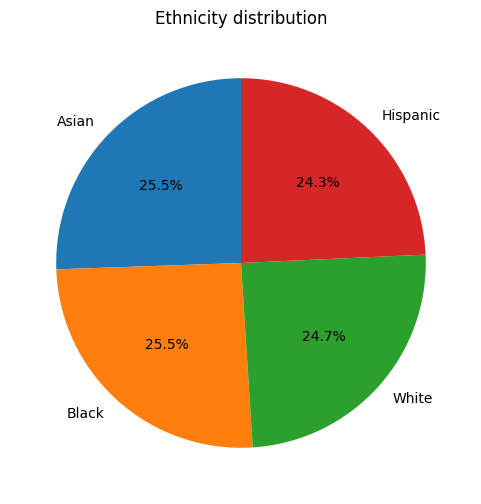

In [ ]:
eth_counts = diabetics['Ethnicity'].value_counts()


plt.figure(figsize=(6,6))
plt.pie(eth_counts, labels=eth_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Ethnicity distribution')
plt.show()


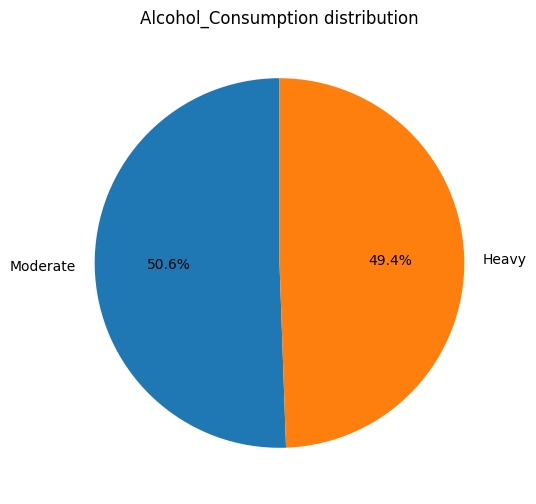

In [ ]:
alcho_counts = diabetics['Alcohol_Consumption'].value_counts()


plt.figure(figsize=(6,6))
plt.pie(alcho_counts, labels=alcho_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Alcohol_Consumption distribution')
plt.show()

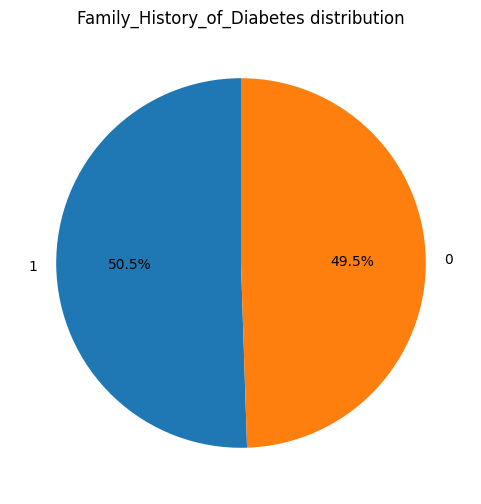

In [ ]:
fam_counts = diabetics['Family_History_of_Diabetes'].value_counts()


plt.figure(figsize=(6,6))
plt.pie(fam_counts, labels=fam_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Family_History_of_Diabetes distribution')
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


In [ ]:
X=df.drop(['Diabetes','Fasting_Blood_Glucose','HbA1c'],axis=1)
y=df['Diabetes'].copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
num_feature=X_train.select_dtypes(include=np.number).columns
cat_feature=X_train.select_dtypes(exclude=np.number).columns

In [ ]:
num_pipeline=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

cat_pipeline=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent',fill_value='missing')),
    ('onehot',OneHotEncoder(handle_unknown='ignore',sparse_output=False))
])

transformer=ColumnTransformer([
    ('num_pipeline',num_pipeline,num_feature),
    ('cat_pipeline',cat_pipeline,cat_feature)
],remainder='passthrough')

model = RandomForestClassifier(n_estimators=70, max_depth=10,class_weight='balanced',random_state=42)

estimator=DecisionTreeClassifier(max_depth=30, min_samples_split=5, min_samples_leaf=5, random_state=42)

model_1 = XGBClassifier( random_state=42)

estimator_1=LogisticRegression( random_state=42)

full_pipeline=Pipeline(steps=[
    ('transformer',transformer),
    ('estimator',model)
])


In [ ]:
full_pipeline.fit(X_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Unnamed: 0', 'Age', 'BMI', 'Waist_Circumference',
       'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic',
       'Cholesterol_Total', 'Cholesterol_HDL', 'Cholesterol...
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Sex', 'Ethnicity', 'Physical_Activity_Level', 'Alcohol_Consumption',
       'Smoking_Status'],
      dtype='object'))])),
                ('estimator',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        n_estimators=70, random_state=42))])

In [ ]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'estimator__max_depth': [10, 20, 30, None],
#     'estimator__min_samples_split': [2, 5, 10],
#     'estimator__min_samples_leaf': [1, 2, 4],
#     'estimator__criterion': ['gini', 'entropy']
# }

# grid_search = GridSearchCV(full_pipeline, param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# print(f"Best parameters: {grid_search.best_params_}")



In [ ]:
full_pipeline.score(X_train,y_train)

0.92375

In [ ]:
full_pipeline.score(X_test,y_test)

0.524

In [ ]:
pred=full_pipeline.predict(X_test)
precision=precision_score(y_test,pred)
precision

0.578112609040444

In [ ]:
recall=recall_score(y_test,pred)
recall

0.6344647519582245

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = full_pipeline.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[319 532]
 [420 729]]


In [ ]:
X_train_transformed = pd.DataFrame(transformer.fit_transform(X_train),columns=transformer.get_feature_names_out())
X_train_transformed

,num_pipeline__Unnamed: 0,num_pipeline__Age,num_pipeline__BMI,num_pipeline__Waist_Circumference,num_pipeline__Blood_Pressure_Systolic,num_pipeline__Blood_Pressure_Diastolic,num_pipeline__Cholesterol_Total,num_pipeline__Cholesterol_HDL,num_pipeline__Cholesterol_LDL,num_pipeline__GGT,num_pipeline__Serum_Urate,num_pipeline__Dietary_Intake_Calories,num_pipeline__Family_History_of_Diabetes,num_pipeline__Previous_Gestational_Diabetes,cat_pipeline__Sex_Female,cat_pipeline__Sex_Male,cat_pipeline__Ethnicity_Asian,cat_pipeline__Ethnicity_Black,cat_pipeline__Ethnicity_Hispanic,cat_pipeline__Ethnicity_White,cat_pipeline__Physical_Activity_Level_High,cat_pipeline__Physical_Activity_Level_Low,cat_pipeline__Physical_Activity_Level_Moderate,cat_pipeline__Alcohol_Consumption_Heavy,cat_pipeline__Alcohol_Consumption_Moderate,cat_pipeline__Smoking_Status_Current,cat_pipeline__Smoking_Status_Former,cat_pipeline__Smoking_Status_Never
0,-1.283988,-0.530548,0.925663,-0.590358,-1.345977,1.254166,-1.727642,0.031283,1.169040,-1.438145,1.577847,-0.489050,0.977014,-0.587166,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-1.334933,-0.809885,0.194851,-0.048407,-0.045479,-0.253785,-0.549353,-1.355575,1.532104,1.204986,-1.029952,1.257497,0.977014,-0.587166,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,-0.095969,0.516966,1.039345,1.084130,-1.231227,-0.079791,0.332045,-1.396768,1.334554,-0.769634,-0.275063,0.618855,0.977014,1.703096,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.040230,-0.740051,-1.559099,0.257308,-0.313229,-0.775768,-0.526158,0.223521,-0.363304,-1.059450,0.136695,0.838215,-1.023527,-0.587166,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,-1.609411,0.516966,1.055586,-0.222109,-0.733978,1.022173,1.234318,-1.142740,-1.399104,1.409790,-1.235831,0.235670,0.977014,1.703096,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-0.175332,-0.600383,1.315430,0.382374,-0.848728,0.790181,0.058348,0.724712,-0.694332,1.626186,-1.235831,0.606360,-1.023527,-0.587166,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7996,-0.585663,-1.578062,1.640236,-0.041459,-0.083729,0.384194,0.965259,1.122919,1.502738,-0.491409,-1.373083,0.567486,-1.023527,-0.587166,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7997,-0.591901,0.726468,-0.178676,0.903480,1.331518,1.022173,-0.259419,-0.648414,1.241119,1.228171,0.617079,-0.808371,-1.023527,1.703096,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
7998,-1.292652,-1.717731,0.503416,-0.889125,-1.498977,0.790181,-0.871759,0.051880,1.211753,-0.843054,1.028837,-0.558468,-1.023527,-0.587166,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
df

,Unnamed: 0,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes,Diabetes
0,0,58,Female,White,35.8,83.4,123.9,10.9,152,114,197.8,50.2,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1,0
1,1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,261.6,62.0,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,0,1
2,2,34,Female,Black,25.0,113.8,142.0,14.5,179,104,261.0,32.1,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0,1
3,3,62,Male,Asian,32.7,100.4,167.4,8.8,176,118,183.4,41.1,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0,1
4,4,27,Female,Asian,33.5,110.8,146.4,7.1,122,97,203.2,53.9,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,45,Female,Asian,39.4,114.0,76.2,13.4,109,82,187.7,60.3,88.7,19.1,6.1,Low,3582,NaN,Former,1,1,0
9996,9996,41,Female,Asian,21.0,71.3,77.1,12.9,154,72,234.3,72.3,200.0,37.1,3.5,Low,2206,NaN,Never,1,1,0
9997,9997,50,Female,Asian,29.0,106.3,97.5,4.9,122,61,266.0,69.8,156.1,85.8,4.9,High,3175,Heavy,Former,1,1,0
9998,9998,62,Female,White,27.3,119.9,89.0,11.5,99,115,172.3,74.2,110.9,25.3,5.2,High,3478,Moderate,Never,1,0,0


In [ ]:
object_col = df.select_dtypes(include=['object'])

In [ ]:
for col in object_col.columns:
    print(f"{col}: {df[col].nunique()} unique values")

Sex: 2 unique values
Ethnicity: 4 unique values
Physical_Activity_Level: 3 unique values
Alcohol_Consumption: 2 unique values
Smoking_Status: 3 unique values


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Sex'] = labelencoder.fit_transform(df['Sex'])
df

,Unnamed: 0,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes,Diabetes
0,0,58,0,White,35.8,83.4,123.9,10.9,152,114,197.8,50.2,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1,0
1,1,48,1,Asian,24.1,71.4,183.7,12.8,103,91,261.6,62.0,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,0,1
2,2,34,0,Black,25.0,113.8,142.0,14.5,179,104,261.0,32.1,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0,1
3,3,62,1,Asian,32.7,100.4,167.4,8.8,176,118,183.4,41.1,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0,1
4,4,27,0,Asian,33.5,110.8,146.4,7.1,122,97,203.2,53.9,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,45,0,Asian,39.4,114.0,76.2,13.4,109,82,187.7,60.3,88.7,19.1,6.1,Low,3582,NaN,Former,1,1,0
9996,9996,41,0,Asian,21.0,71.3,77.1,12.9,154,72,234.3,72.3,200.0,37.1,3.5,Low,2206,NaN,Never,1,1,0
9997,9997,50,0,Asian,29.0,106.3,97.5,4.9,122,61,266.0,69.8,156.1,85.8,4.9,High,3175,Heavy,Former,1,1,0
9998,9998,62,0,White,27.3,119.9,89.0,11.5,99,115,172.3,74.2,110.9,25.3,5.2,High,3478,Moderate,Never,1,0,0


In [ ]:
df = pd.get_dummies(df, columns=['Ethnicity', 'Physical_Activity_Level', 'Alcohol_Consumption', 'Smoking_Status'], drop_first=True)
df

,Unnamed: 0,Age,Sex,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Dietary_Intake_Calories,Family_History_of_Diabetes,Previous_Gestational_Diabetes,Diabetes,Ethnicity_Black,Ethnicity_Hispanic,Ethnicity_White,Physical_Activity_Level_Low,Physical_Activity_Level_Moderate,Alcohol_Consumption_Moderate,Smoking_Status_Former,Smoking_Status_Never
0,0,58,0,35.8,83.4,123.9,10.9,152,114,197.8,50.2,99.2,37.5,7.2,1538,0,1,0,False,False,True,False,True,True,False,True
1,1,48,1,24.1,71.4,183.7,12.8,103,91,261.6,62.0,146.4,88.5,6.1,2653,0,0,1,False,False,False,False,True,True,False,False
2,2,34,0,25.0,113.8,142.0,14.5,179,104,261.0,32.1,164.1,56.2,6.9,1684,1,0,1,True,False,False,True,False,False,True,False
3,3,62,1,32.7,100.4,167.4,8.8,176,118,183.4,41.1,84.0,34.4,5.4,3796,1,0,1,False,False,False,True,False,True,False,True
4,4,27,0,33.5,110.8,146.4,7.1,122,97,203.2,53.9,92.8,81.9,7.4,3161,0,0,1,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,45,0,39.4,114.0,76.2,13.4,109,82,187.7,60.3,88.7,19.1,6.1,3582,1,1,0,False,False,False,True,False,False,True,False
9996,9996,41,0,21.0,71.3,77.1,12.9,154,72,234.3,72.3,200.0,37.1,3.5,2206,1,1,0,False,False,False,True,False,False,False,True
9997,9997,50,0,29.0,106.3,97.5,4.9,122,61,266.0,69.8,156.1,85.8,4.9,3175,1,1,0,False,False,False,False,False,False,True,False
9998,9998,62,0,27.3,119.9,89.0,11.5,99,115,172.3,74.2,110.9,25.3,5.2,3478,1,0,0,False,False,True,False,False,True,False,True


In [ ]:
X = df.drop('Diabetes', axis=1)  # All columns except 'Diabetes'
y = df['Diabetes']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)


y_pred = logreg.predict(X_test)


acc = accuracy_score(y_test, y_pred)
print(f'Accuracy of Logistic Regression model: {acc:.2f}')

Accuracy of Logistic Regression model: 0.95


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
logreg.score(X_train,y_train),logreg.score(X_test,y_test)

(0.953625, 0.95)

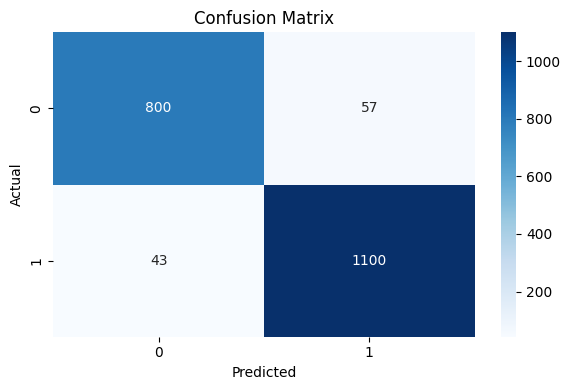

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()